## **Prediction using supervised model -  Linear Regression**
### **Predict the percentage of an student based on the no. of study hours.**
#### **Author : Sara AbdelAzim**
#### **TSF GRIP Data Science & Business Intelligenc - Task1**


Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  


## **Step 1: Import the Data**

#### **Read the data**

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')

#### **View sample of the data**

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## **Step 2 : Data Preprocessing (Cleaning)**

#### **2.1 Check Null Value**

In [4]:
df.isnull().any()

Hours     False
Scores    False
dtype: bool

**No null values exist in the dataset**

#### **2.2 Check for Outliers**

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

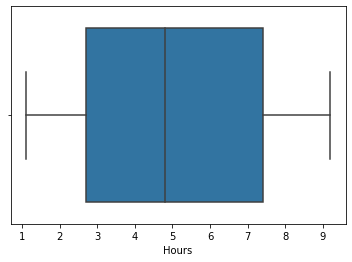

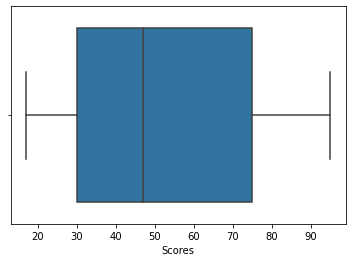

In [10]:
for column in df:
    sns.boxplot(x=df[column])
    plt.show()

**No outliers presented in the dataset**

## **Step 3 : Data Visualization**

### **Plot the data**

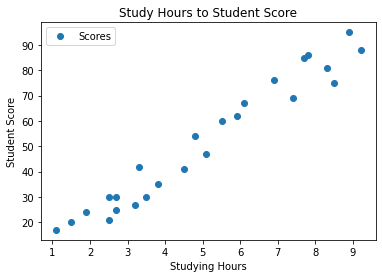

In [18]:
df.plot(x = 'Hours', y = 'Scores', style = 'o')
plt.title('Study Hours to Student Score')
plt.xlabel('Studying Hours')
plt.ylabel('Student Score')
plt.show()

**The graph represents a positive Linear regression relationship meaning the more hours spent studying the higher the score is**

## **Step 4: Data Preperation**

In [20]:
df.keys()

Index(['Hours', 'Scores'], dtype='object')

#### **4.1 Split data into X - input variable and Y- target output**

In [24]:
X = df[['Hours']].values
Y = df[['Scores']].values

#### **4.2 Split data into train set of 0.8 and test set of 0.2 for the model**

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=0)

## **Step 5 : Prepare the Model - Regressor**

In [27]:
from sklearn.linear_model import LinearRegression  

#### **5.1 Prepare Linear Regression Model**

In [28]:
regressor = LinearRegression()  
regressor.fit(X_train, Y_train)

LinearRegression()

#### **5.2 Find Best Fit Line**

In [29]:
fitLine = (regressor.coef_*X) + (regressor.intercept_)

#### **5.2.1 Plot Best Fit Line to the Given Data**

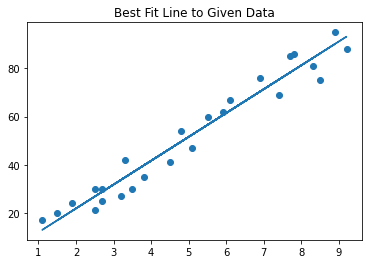

In [69]:
plt.scatter(X, Y)
plt.plot(X, fitLine)
plt.title('Best Fit Line to Given Data')

plt.show()

## **Step 6 : Test the Model (Predicting scores)**

#### **6.1 Test1 : Predict Score with Sample Study Hours Values of the Test Set**

In [48]:
Y_pred = regressor.predict(X_test)          
print(X_test)                               
print(Y_pred)                               


[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]
[[16.88414476]
 [33.73226078]
 [75.357018  ]
 [26.79480124]
 [60.49103328]]


#### **6.1.1 Plot Predicted Scores Given Study Hours Sample of Test Set**

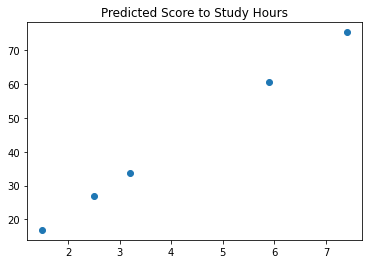

In [50]:
plt.scatter(X_test, Y_pred)
plt.title('Predicted Score to Study Hours')
plt.show()

#### **6.2 Test2: What will be predicted score if a student studies for 9.25 hrs/ day?**

In [62]:
studyHours = np.array(9.25).reshape(1, -1)

In [63]:
pred = regressor.predict(studyHours)
print('For {0} Study Hours You Are Likely to get {1} Score'.format(9.25,pred[0]))

For 9.25 Study Hours You Are Likely to get [93.69173249] Score


### **Step 7 : Model Accuracy**

In [37]:
from sklearn import metrics

#### **Mean absolute error (MAE)**

In [68]:
print('Mean absolute error: {0}'.format(metrics.mean_absolute_error(Y_test,Y_pred)))

Mean absolute error 4.183859899002975


#### **Root mean squared error (RMSE)**

In [65]:
print('Root mean squared error: {0}'.format(np.sqrt(metrics.mean_absolute_error(Y_test,Y_pred))))

Root mean squared error: 2.0454485813637495


**From the result can say that the model can't perform well and this can be caused by small data sample**